> Copyright 2025 Giovanni Squillero <<giovanni.squillero@polito.it>>  
> SPDX-License-Identifier: `0BSD`

In [1]:
# from itertools import accumulate
from icecream import ic
import numpy as np
from tqdm.auto import tqdm
import seaborn as sns
# from matplotlib import pyplot as plt

# 0-1 Multiple Knapsack Problem

see: [https://en.wikipedia.org/wiki/Knapsack_problem](https://en.wikipedia.org/wiki/Knapsack_problem)

In [2]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [3]:
NUM_ITEMS = 100
DIMENSIONS = 5
MAX_STEPS = 20_000

WEIGHTS = np.random.randint(1, 50 + 1, size=(NUM_ITEMS, DIMENSIONS))
MAX_WEIGHTS = np.full(DIMENSIONS, NUM_ITEMS * 20)
VALUES = np.random.randint(1, 100 + 1, size=NUM_ITEMS)

In [4]:
def evaluate(knapsack):
    if all(np.sum(WEIGHTS[knapsack], axis=0) < MAX_WEIGHTS):
        return np.sum(VALUES[knapsack])
    else:
        return -1

In [5]:
WEIGHTS

array([[39, 29, 15, 43,  8],
       [21, 39, 19, 23, 11],
       [11, 24, 36, 40, 24],
       [ 3, 22,  2, 24, 44],
       [30, 38,  2, 21, 33],
       [12, 22, 44, 25, 49],
       [27, 42, 28, 16, 15],
       [47, 44,  3, 37,  7],
       [21,  9, 39, 18,  4],
       [25, 14, 50,  9, 26],
       [ 2, 20, 28, 47,  7],
       [44,  8, 47, 35, 14],
       [17, 36, 50, 40,  4],
       [ 2,  6, 42,  4, 29],
       [18, 26, 44, 34, 10],
       [36, 14, 31, 48, 15],
       [ 8, 14, 23, 40, 21],
       [16, 45, 18, 47, 24],
       [26, 25, 45, 41, 29],
       [15, 45,  1, 25,  7],
       [ 9, 24,  1, 44,  8],
       [24, 11, 17,  8, 35],
       [35, 33,  5, 42, 39],
       [41, 28,  7,  9,  8],
       [12, 34, 33, 48, 23],
       [24, 37, 35, 44, 40],
       [22, 27, 35,  1, 35],
       [37, 47, 14,  3,  1],
       [ 5, 26, 14, 39, 27],
       [ 9, 15, 15, 26, 42],
       [13, 32, 39, 49, 32],
       [ 4, 30, 37, 23, 39],
       [45, 15, 43, 29, 36],
       [13, 32,  7, 22, 28],
       [ 2, 42

In [6]:
MAX_WEIGHTS

array([2000, 2000, 2000, 2000, 2000])

In [7]:
VALUES

array([ 48,  85,  39, 100,  33,  94,  23,  10,  69, 100,  34,  52,  95,
        10,  19,  58,  96,   1,  69,   4,  16,  24,  80,   2,  92,  32,
        91,  84,  24,  12,  50,  35,  33,  33,  61,  51,  43,  12,  67,
        65,  33,  40,  74,  43,  44,  29,  13,  12,  95,  46,   2,  35,
        87,  81,  90,   8,  93,  26,  74,  90,  34,   7,  68,  58,  75,
        29,  36,  89,  21,  36,  10,  73,  24,  64,  99,  49,  99,  36,
        82,  96,  24,  23,  62,  96,  37,  12,  55,  13,  23,  89,  99,
        30,  17,  62,  84,  89,  86,  13,  59,  19])

In [8]:
# solution = np.array([True, True, False, True, True])
# evaluate(solution)

In [9]:
# solution

In [10]:
def tweak(solution, p=0):
    assert evaluate(solution) > -1
    new_solution = solution.copy()
    idx = np.random.randint(0, NUM_ITEMS)
    # new_solution[idx] = not new_solution[idx]
    assert evaluate(new_solution) > -1
    while np.random.random() < p:
        idx = np.random.randint(0, NUM_ITEMS)
        new_solution[idx] = not new_solution[idx]
    # assert evaluate(new_solution) > -1
    return new_solution

In [11]:
initial_solution = np.random.choice([True, False], size=NUM_ITEMS)
# initial_solution = np.array([True, False, True, True, True, True, True, False, True, False])
initial_solution

array([ True, False, False,  True,  True,  True, False,  True,  True,
       False, False,  True, False, False,  True, False,  True, False,
        True,  True,  True, False,  True, False,  True,  True, False,
        True,  True, False,  True,  True,  True,  True, False, False,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True, False,  True, False,  True, False, False, False,  True,
        True, False,  True, False,  True, False, False,  True, False,
        True, False, False,  True,  True,  True, False,  True, False,
       False,  True,  True, False, False,  True,  True,  True,  True,
        True, False, False, False, False,  True,  True,  True, False,
       False,  True,  True, False, False,  True,  True, False,  True,
        True])

In [12]:
best_solution = initial_solution.copy()

tries = 0

xdata = [0]
ydata = [evaluate(best_solution)]

for step in tqdm(range(MAX_STEPS)):
    tries += 1

    for x in range(10):
        new_solution = tweak(best_solution, p=x/10)
        # assert evaluate(new_solution) > -1
        if evaluate(new_solution) > evaluate(best_solution):
            best_solution = new_solution.copy()
            ic(tries, evaluate(best_solution))
        # if tries > 1_000:
        #     ic(tries, evaluate(best_solution))
        #     new_solution = tweak(best_solution, 0.1)
        #     tries = 0
        #     continue
    
    if 0 <= step < MAX_STEPS:
        xdata.append(step)
        ydata.append(evaluate(new_solution))

# ic(max(xdata))
# ic(max(ydata))
ic(tries)
ic(best_solution)
ic(evaluate(best_solution))

  0%|          | 0/20000 [00:00<?, ?it/s]

ic| tries: 1, evaluate(best_solution): np.int64(2946)
ic| tries: 1, evaluate(best_solution): np.int64(2956)
ic| tries: 2, evaluate(best_solution): np.int64(3007)
ic| tries: 2, evaluate(best_solution): np.int64(3103)
ic| tries: 2, evaluate(best_solution): np.int64(3164)
ic| tries: 2, evaluate(best_solution): np.int64(3184)
ic| tries: 3, evaluate(best_solution): np.int64(3259)
ic| tries: 4, evaluate(best_solution): np.int64(3261)
ic| tries: 4, evaluate(best_solution): np.int64(3396)
ic| tries: 5, evaluate(best_solution): np.int64(3417)
ic| tries: 5, evaluate(best_solution): np.int64(3465)
ic| tries: 6, evaluate(best_solution): np.int64(3476)
ic| tries: 7, evaluate(best_solution): np.int64(3574)
ic| tries: 8, evaluate(best_solution): np.int64(3611)
ic| tries: 8, evaluate(best_solution): np.int64(3644)
ic| tries: 8, evaluate(best_solution): np.int64(3738)
ic| tries: 9, evaluate(best_solution): np.int64(3782)
ic| tries: 11, evaluate(best_solution): np.int64(3818)
ic| tries: 13, evaluate(bes

np.int64(4593)

<Axes: >

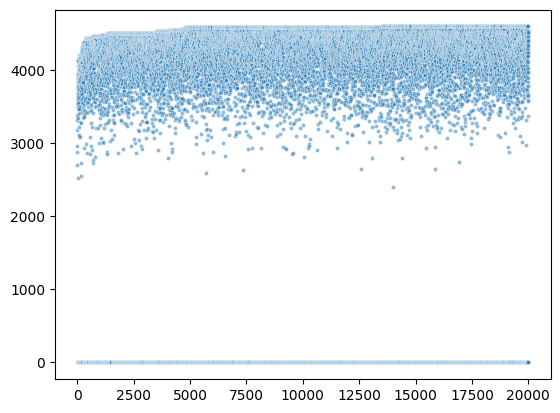

In [13]:
sns.scatterplot(
    x=xdata,
    y=ydata,
    marker='.',
    alpha=0.5)

<Axes: >

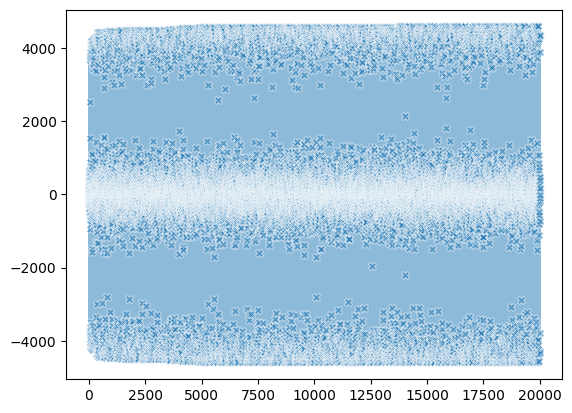

In [14]:
sns.lineplot(
    x=xdata[1:],
    y=[y1-y0 for y0, y1 in zip(ydata, ydata[1:])],
    marker='X',
    alpha=0.5)

In [15]:
# Alessio solution

def tweak(sol):
    new_sol = sol.copy()
    i = np.random.randint(0, NUM_ITEMS)
    new_sol[i] = not new_sol[i]
    return new_sol
 
tries = 0
best = initial_solution[:]
while tries < MAX_STEPS:
    tries += 1
    new = tweak(best)
    if evaluate(new) > evaluate(best):
        best = new
        # print(f"tries {tries}: new best {evaluate(best)}")
print(f"found best {evaluate(best)} after random {tries} tries")

found best 3534 after random 20000 tries


In [16]:
xdata

[0,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 1

In [17]:
ydata

[np.int64(2878),
 np.int64(2956),
 np.int64(3173),
 np.int64(2704),
 np.int64(3363),
 np.int64(3310),
 np.int64(3461),
 np.int64(3574),
 np.int64(3542),
 np.int64(3531),
 np.int64(3343),
 np.int64(3818),
 np.int64(3763),
 np.int64(3510),
 np.int64(3842),
 np.int64(3610),
 np.int64(3489),
 np.int64(3667),
 np.int64(3929),
 np.int64(3943),
 np.int64(3666),
 np.int64(3762),
 np.int64(3400),
 np.int64(3659),
 np.int64(3894),
 np.int64(3755),
 np.int64(3551),
 np.int64(3945),
 np.int64(3779),
 -1,
 np.int64(2520),
 np.int64(4057),
 -1,
 np.int64(3887),
 np.int64(3872),
 np.int64(3595),
 np.int64(4113),
 np.int64(4128),
 np.int64(3880),
 np.int64(3595),
 np.int64(4134),
 np.int64(4134),
 -1,
 -1,
 np.int64(3680),
 np.int64(3745),
 np.int64(3626),
 -1,
 np.int64(3722),
 np.int64(3898),
 np.int64(3544),
 np.int64(3482),
 np.int64(3876),
 np.int64(3214),
 np.int64(3841),
 -1,
 np.int64(3665),
 np.int64(4052),
 np.int64(3893),
 np.int64(3623),
 np.int64(3886),
 np.int64(4076),
 np.int64(4028),
 